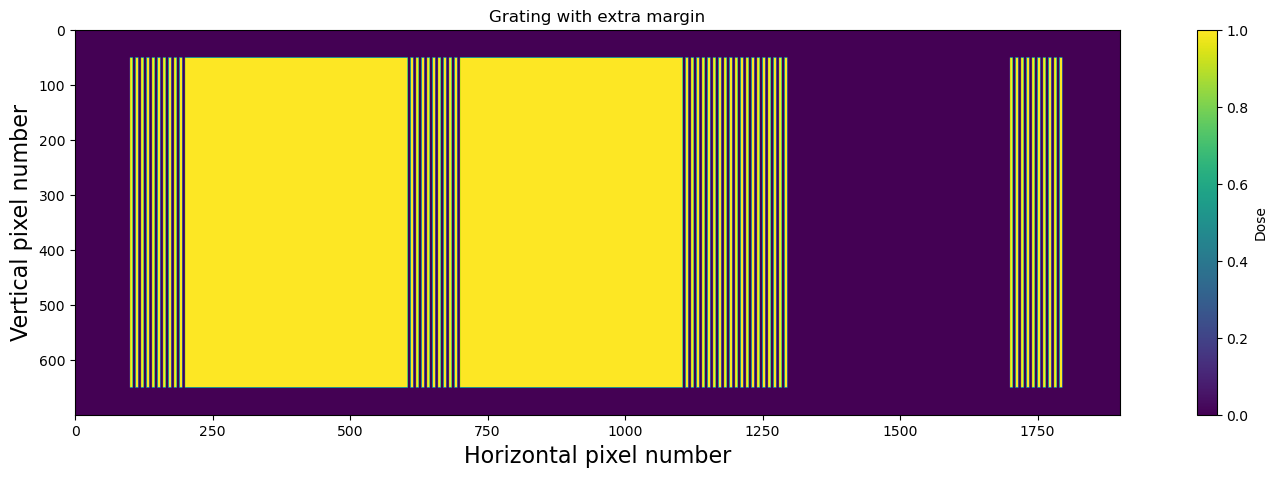

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import resize 

eta = 0.5 #@50 keV on si
sigma_b = 6 #@50 keV on si

RT = 1 # Resist Threshold 
#ED =  #Effective Dose

#PB = (eta/sigma_b**2) * np.exp(-np.abs(r**2)/sigma_b**2)

min_pix_size = int(25) #nanometers 
width = int(42500) #nanometers 
height = int(15000) #nanometers 
pix_width = int(width/min_pix_size)
pix_height = int(height/min_pix_size)

y = np.linspace(0,int(width),int(pix_width)) #Radius
x = np.linspace(0,int(height),int(pix_height))


dose_map = np.zeros((pix_height,pix_width))
grating_width = 250
pix_grating_width = int(grating_width/min_pix_size)


left_grating = np.zeros((pix_height, pix_grating_width*20))


for i in range(dose_map.shape[1]):
    for j in range(dose_map.shape[0]):
        if i < 100:
            if i%10 < 5:
                dose_map[j,i] = 1
                
        if 99.5 < i < 500:
            dose_map[j,i] = 1

        if 499.5 < i < 600:
            if i%10 < 5:
                dose_map[j,i] = 1

        if 599.5 < i < 1000:
            dose_map[j,i] = 1

        if 999.5 < i < 1200:
            if i%10 < 5:
                dose_map[j,i] = 1

        if 1199.5 < i < 1600:
            dose_map[j,i] = 0

        if 1599.5 < i < 1700:
            if i%10 < 5:
                dose_map[j,i] = 1
    


# Desired padding on each side
pad_left = 100
pad_right = 100
pad_top = 50
pad_bottom = 50


# Original dimensions
orig_height, orig_width = dose_map.shape

# New array with extra rows/columns for padding
new_height = orig_height + pad_top + pad_bottom
new_width  = orig_width  + pad_left + pad_right

dose_map_padded = np.zeros((new_height, new_width))

# Copy the original dose_map into the padded array
dose_map_padded[pad_top:pad_top+orig_height, pad_left:pad_left+orig_width] = dose_map

dose_map = dose_map_padded

plt.figure(figsize=(20, 5))
plt.imshow(dose_map, cmap='viridis')
plt.colorbar(label='Dose')
plt.xlabel('Horizontal pixel number', fontsize=16)
plt.ylabel('Vertical pixel number', fontsize=16)
plt.title('Grating with extra margin')
plt.show()


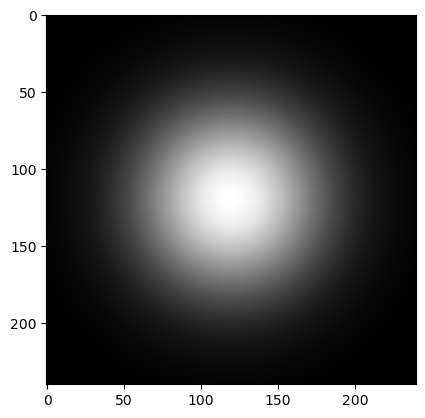

<Figure size 640x480 with 0 Axes>

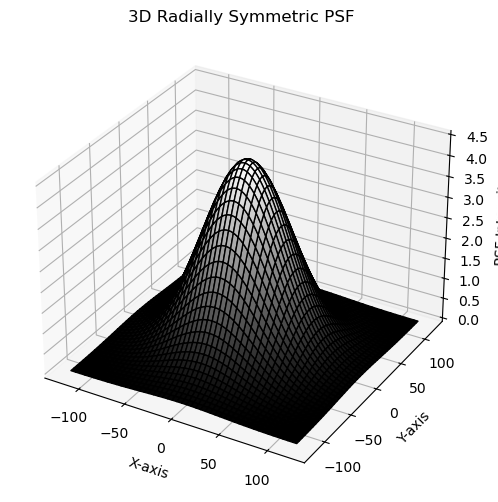

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [8]:
from scipy.ndimage import convolve
from scipy.signal import convolve2d
import numpy as np
import matplotlib.pyplot as plt

# Constants for the PSF
sigma_B = 6  # microns @50 keV on si 
eta = 0.5 #@50 keV on si 

# Grid setup
grid_size = (500, 500)  # Pixels
x_extent = 50  # Micron extent in the x-direction
pixel_per_micron = grid_size[1] / x_extent  # Pixels per micron

# Convert sigma_B to pixels
sigma_B_pixels = sigma_B * pixel_per_micron

# Define the point spread function (PSF)
def point_spread_function(r, sigma_B_pixels, eta):
    return (eta / (sigma_B_pixels**2)) * np.exp(-(r / sigma_B_pixels)**2)

# Create a PSF kernel
kernel_size = int(4 * sigma_B_pixels)  # Ensure the kernel is large enough
x = np.linspace(-kernel_size / 2, kernel_size / 2, kernel_size)
y = np.linspace(-kernel_size / 2, kernel_size / 2, kernel_size)
X, Y = np.meshgrid(x, y)

r = np.sqrt(X**2 + Y**2)
PSF_kernel = point_spread_function(r, sigma_B_pixels, eta)

# Normalize the kernel so it sums to 1

PSF_kernel /= PSF_kernel.sum()
PSF_kernel = PSF_kernel * eta

plt.imshow(PSF_kernel,cmap = 'gray')
plt.show()
plt.figure()

# Plot the 3D surface
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, PSF_kernel, cmap='grey',edgecolor='black')

# Customize the plot
ax.set_title('3D Radially Symmetric PSF')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('PSF Intensity')
plt.show()
plt.figure()



In [10]:
from scipy.signal import convolve2d

dose_with_scattering = convolve2d(dose_map, PSF_kernel, mode='same')



<>:38: SyntaxWarning: invalid escape sequence '\m'
<>:38: SyntaxWarning: invalid escape sequence '\m'
/var/folders/sm/89rv8yy96bscxt0tyvc5xpjm0000gn/T/ipykernel_26040/1050817269.py:38: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Position $(\mu$m)')


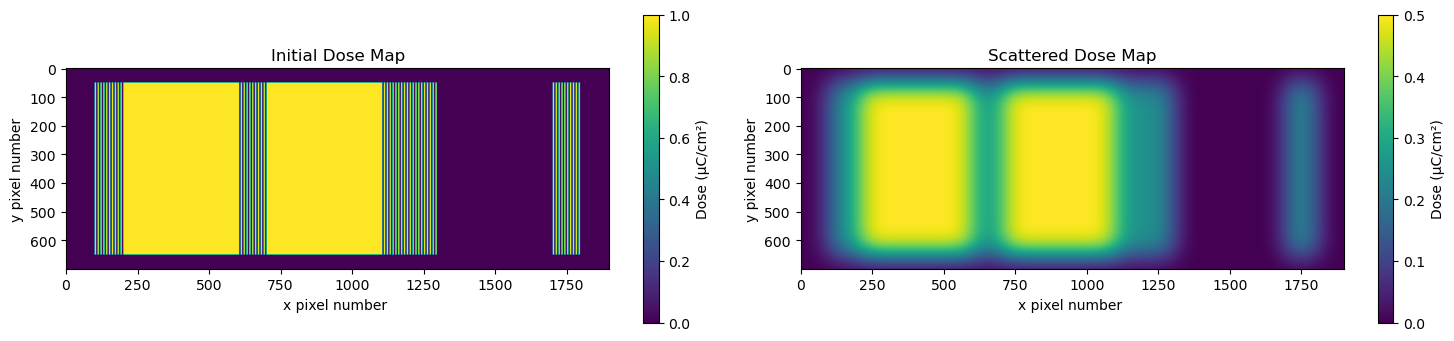

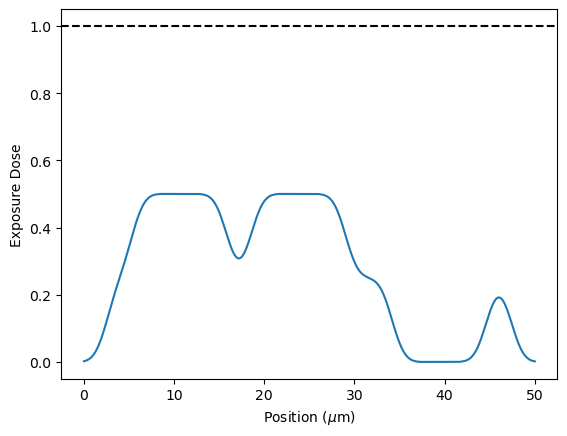

In [11]:


# Create a figure with 3 subplots arranged in a row
fig, axes = plt.subplots(1, 2, figsize=(15, 8) ) # 1 row, 2 columns

# Plot the first figure
axes[0].imshow(dose_map, cmap='viridis')
axes[0].set_title('Initial Dose Map')
#axes[0].set_xlabel('x (µm)')
#axes[0].set_ylabel('y (µm)')
axes[0].set_xlabel('x pixel number ')
axes[0].set_ylabel('y pixel number')
cbar1 = fig.colorbar(axes[0].images[0], ax=axes[0], orientation='vertical', shrink=0.4)
cbar1.set_label('Dose (μC/cm²)')

# Plot the second figure
axes[1].imshow(dose_with_scattering, cmap='viridis')
axes[1].set_title('Scattered Dose Map')
#axes[1].set_xlabel('x (µm)')
#axes[1].set_ylabel('y (µm)')
axes[1].set_xlabel('x pixel number ')
axes[1].set_ylabel('y pixel number')
cbar2 = fig.colorbar(axes[1].images[0], ax=axes[1], orientation='vertical', shrink=0.4)
cbar2.set_label('Dose (μC/cm²)')


# Adjust layout for better spacing
plt.tight_layout()
plt.show()





dose_slice = dose_with_scattering[300,:]
x_1d = np.linspace(0, 50, len(dose_slice))

plt.plot(x_1d,dose_slice)
plt.axhline(y = 1.0, color = 'black', linestyle = '--') 
plt.xlabel('Position $(\mu$m)')
plt.ylabel('Exposure Dose')
plt.savefig('1D Dose.png')

In [16]:

mask = np.where(dose_map == 0)

d_0 = 1.0

iterations = 5
for j in range(iterations):

    #Determining the scattered dose 
    Convolution = convolve2d(dose_map, PSF_kernel, mode='same')
    
    #Correcting the dose using formula from Watson paper 
    dose_map = 2 * (d_0 - Convolution)
    
    dose_map[mask] = 0
    
    print(j)


0
1
2
3
4


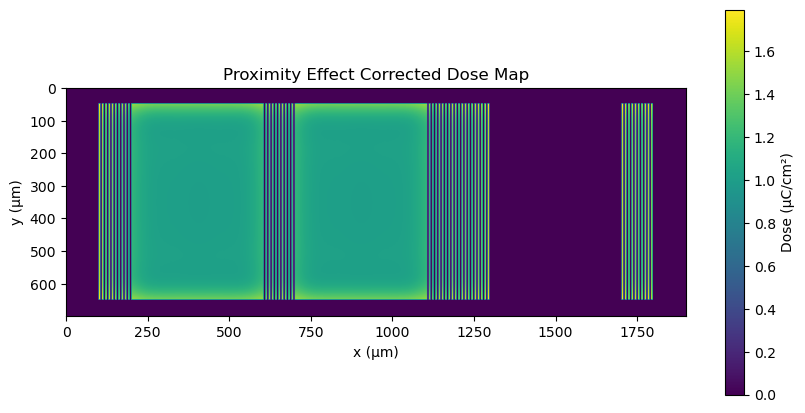

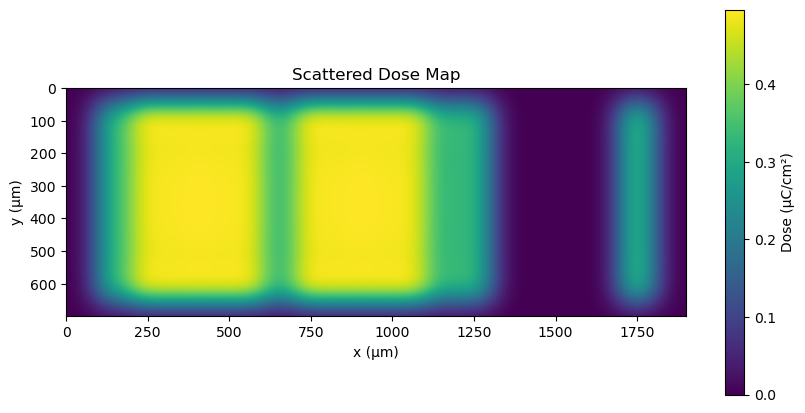

In [28]:
Scattered_dose = Convolution

plt.figure(figsize=(10, 5))
plt.imshow(dose_map, cmap='viridis')
plt.colorbar(label='Dose (μC/cm²)')
plt.xlabel('x (µm)')
plt.ylabel('y (µm)')
plt.title('Proximity Effect Corrected Dose Map')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(Scattered_dose, cmap='viridis')
plt.colorbar(label='Dose (μC/cm²)')
plt.xlabel('x (µm)')
plt.ylabel('y (µm)')
plt.title('Scattered Dose Map')
plt.show()

<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
/var/folders/sm/89rv8yy96bscxt0tyvc5xpjm0000gn/T/ipykernel_26040/3867068914.py:19: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Position $(\mu$m)')


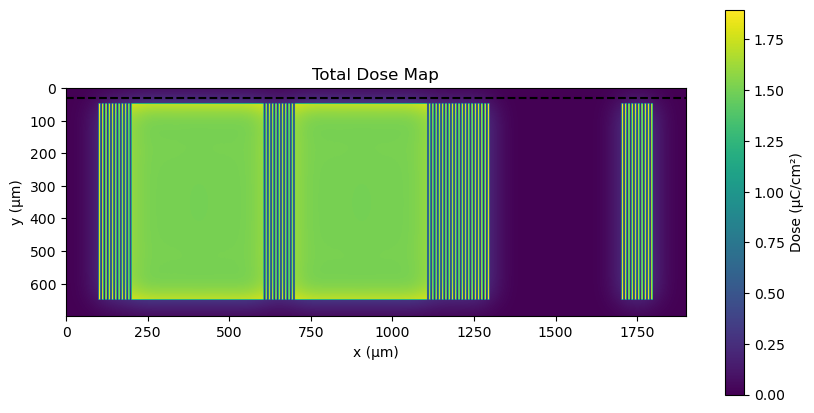

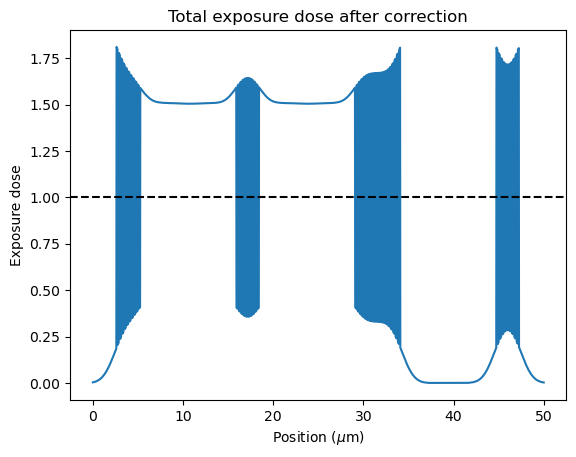

In [30]:
Total_dose = dose_map + Scattered_dose

a = 300
Total_dose_slice = Total_dose[a,:]
x_1d = np.linspace(0, 50, len(dose_slice))

plt.figure(figsize=(10, 5))
plt.imshow(Total_dose, cmap='viridis')
plt.axhline(y= 30, color='black', linestyle='--', linewidth=1.5)
plt.colorbar(label='Dose (μC/cm²)')
plt.xlabel('x (µm)')
plt.ylabel('y (µm)')
plt.title('Total Dose Map')
plt.show()


plt.plot(x_1d,Total_dose_slice)
plt.axhline(y = d_0, color = 'black', linestyle = '--') 
plt.xlabel('Position $(\mu$m)')
plt.ylabel('Exposure dose')
plt.title('Total exposure dose after correction')
plt.savefig('1D Dose.png')

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
/var/folders/sm/89rv8yy96bscxt0tyvc5xpjm0000gn/T/ipykernel_26040/2685359839.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Position $(\mu$m)')


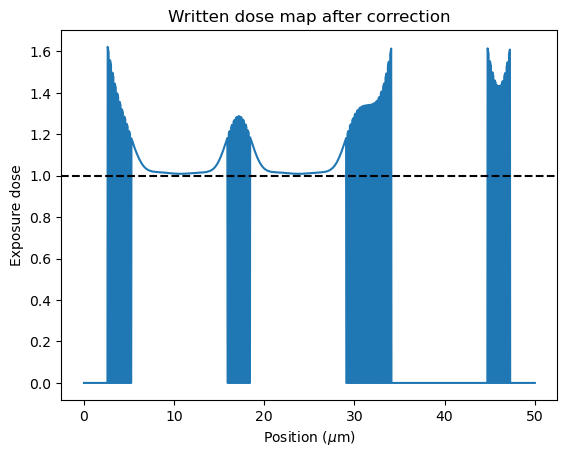

In [32]:
written_dose_slice = dose_map[a,:]

plt.plot(x_1d,written_dose_slice)
plt.axhline(y = d_0, color = 'black', linestyle = '--') 
plt.xlabel('Position $(\mu$m)')
plt.ylabel('Exposure dose')
plt.title('Written dose map after correction')
plt.savefig('1D Dose.png')